In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn import preprocessing, svm, metrics, decomposition
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split, KFold
import pickle

In [2]:
stationfile = open("data_cleaned/stations_data","rb")
tripfile = open("data_cleaned/trips_data","rb")
weatherfile = open("data_cleaned/weathers_data","rb")
statusfile = open("data_cleaned/status_data","rb")
stations = pickle.load(stationfile)
trips = pickle.load(tripfile)
weathers = pickle.load(weatherfile)
status = pickle.load(statusfile)
cal = calendar()
holidays = cal.holidays(start = trips['Start Date'].min(), end = trips['Start Date'].max())

# Define demand
We'll define demand as number of bike will be borrowed in the future 15 minutes. Therefore, we will have 4 period in each hour. 

In [149]:
# Define demand column by counting the number of bike borrowed in particular station in the next 1 Hour
t = trips.set_index('Start Date')
t = t.groupby([pd.TimeGrouper('H'), 'Start Terminal']).size().unstack('Start Terminal').fillna(0)
t = t.stack().reset_index('Start Terminal')
t = t.rename(columns = {0: 'Demand'})

# Parse out the time details
t['year'] = t.index.year
t['month'] = t.index.month
t['day'] = t.index.day
t['hour'] = t.index.hour

# Set up workday
t['PDT'] = t.index.date
t['PDT'] = pd.to_datetime(t.PDT)
t = t.reset_index()
weekday = t['Start Date'].dt.weekday
t['workday'] = weekday.isin([0,1,2,3,4]) & (t.PDT.isin(holidays) == False)

# Analyze Demand on different date

It seems that the demand has large difference at the same hour in different date.
We can surely notice there's difference between workday and holiday/weekend. However, are there some workdays that we should regard as holiday? Let's find it out by analyzing the data.

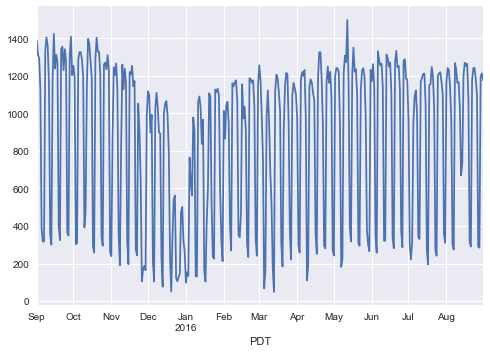

In [141]:
t.groupby('PDT').sum().Demand.plot()

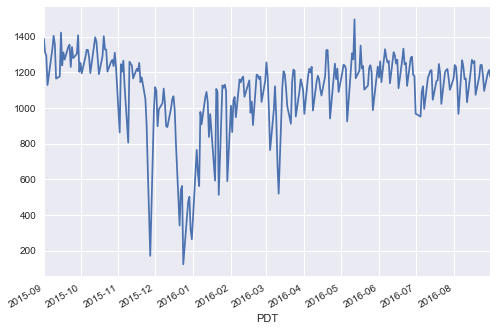

In [150]:
t[t.workday].groupby('PDT').sum().Demand.plot()

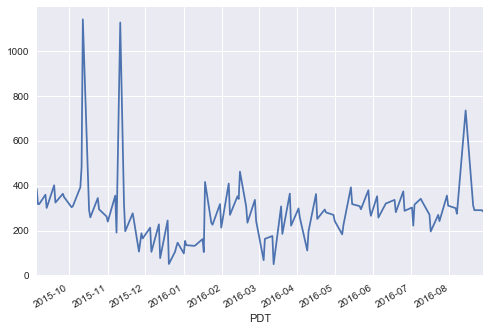

In [151]:
t[t.workday==False].groupby('PDT').sum().Demand.plot()

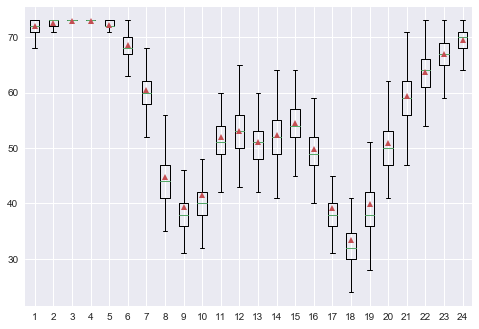

In [142]:
D = []
de = t[t.workday]

for i in range(24):
    temp = de[(de.hour == i) & (de.Demand == 0)].groupby(by='PDT').count().Demand.sort_values(ascending = False)
    D.append(temp)

plt.boxplot(D, showmeans=True);

In [102]:
# Demand statistics in workday
sts = t['Start Terminal'].unique()
hours = t.hour.unique()
demand_w = pd.DataFrame(columns = ['Start Terminal','Hour', 'Mean','Var', 'Std'])

for i, s in enumerate(sts):
    for j, h in enumerate(hours):
        m = t[(t['Start Terminal'] == s)&(t.hour == h)&t.workday].Demand.mean()
        v = t[(t['Start Terminal'] == s)&(t.hour == h)&t.workday].Demand.var()
        std = t[(t['Start Terminal'] == s)&(t.hour == h)&t.workday].Demand.std()
        demand_w.loc[i*len(hours)+j] = [s,j,m,v,std]

In [ ]:
f.read()

In [153]:
A = np.random.randn(5)
B = np.random.randn(5)

for a, b in izip(A, B):
    a+b

NameError: name 'izip' is not defined

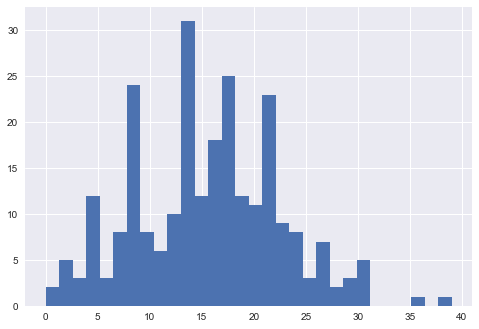

In [103]:
t[(t['Start Terminal'] == 69)&(t.hour == 9)&t.workday].Demand.hist(bins = 30)